# Simulación sin Paralelizar


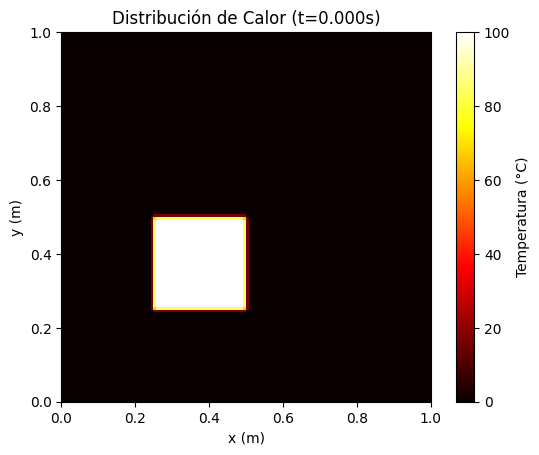

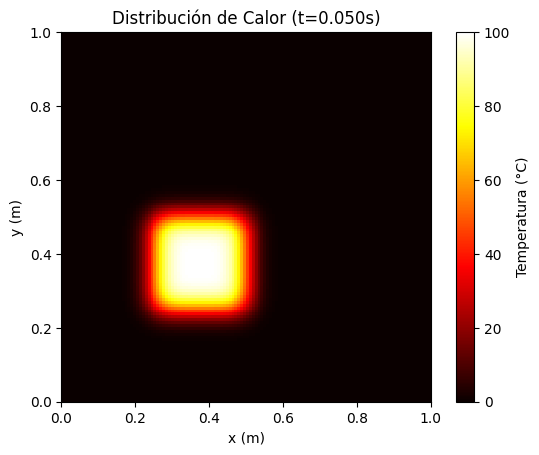

Tiempos por paso: [0.07354474067687988, 0.07400298118591309, 0.08784008026123047, 0.07130646705627441, 0.07647991180419922, 0.17323589324951172, 0.40886807441711426, 0.2454531192779541, 0.10859155654907227, 0.0745997428894043, 0.07115006446838379, 0.07705330848693848, 0.07427501678466797, 0.07206940650939941, 0.07493329048156738, 0.08138155937194824, 0.08992981910705566, 0.10610389709472656, 0.09136557579040527, 0.06957602500915527, 0.06944870948791504, 0.0715327262878418, 0.07123279571533203, 0.06880950927734375, 0.07329750061035156, 0.08227753639221191, 0.08732938766479492, 0.12527060508728027, 0.07145071029663086, 0.07029223442077637, 0.08346796035766602, 0.08421015739440918, 0.08242273330688477, 0.07529330253601074, 0.090789794921875, 0.09123682975769043, 0.08927249908447266, 0.07166171073913574, 0.06766128540039062, 0.06245565414428711, 0.06993818283081055, 0.07103133201599121, 0.06666707992553711, 0.06586503982543945, 0.0703589916229248, 0.06363511085510254, 0.06158137321472168, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


'''Función para actualizar la placa en CPU'''

def update_plate_cpu(u_old, u_new, alpha, dt, dx, dy, Nx, Ny):
    # Se recorre toda la malla de la placa (excepto los bordes)
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            # Cálculo de la nueva temperatura en cada punto (método de diferencias finitas)
            u_new[i, j] = u_old[i, j] + alpha * dt * (
                (u_old[i + 1, j] - 2 * u_old[i, j] + u_old[i - 1, j]) / dx**2 +  # Derivada espacial en la dirección x
                (u_old[i, j + 1] - 2 * u_old[i, j] + u_old[i, j - 1]) / dy**2    # Derivada espacial en la dirección y
            )


'''Inicialización de parámetros'''

Lx, Ly = 1.0, 1.0          # Dimensiones de la placa (en metros)
Nx, Ny = 128, 128          # Número de puntos en x e y (tamaño de la placa)
dx, dy = Lx / Nx, Ly / Ny  # Tamaño de las celdas (resolución espacial)
alpha = 0.01               # Coeficiente de conductividad térmica
dt = 0.001                 # Paso temporal
T = 0.1                    # Tiempo total de la simulación
timesteps = int(T / dt)    # Número de pasos temporales


'''Condiciones iniciales'''

u_old = np.zeros((Nx, Ny), dtype=np.float32)    # Temperatura inicial (0°C en toda la placa)
u_old[Nx//4:Nx//2, Ny//4:Ny//2] = 100           # Región inicial caliente (100°C)
u_new = np.zeros_like(u_old)                    # Temperatura nueva (se inicializa en 0°C)


'''Simulación'''

time_per_step = []             # Lista donde se guardarán los tiempos de cada paso temporal
for step in range(timesteps):  # Iterar sobre los pasos temporales
    start_time = time.time()   # Iniciar temporizador para medir el tiempo de la iteración


    '''Actualizar la placa usando CPU'''

    update_plate_cpu(u_old, u_new, alpha, dt, dx, dy, Nx, Ny)  # Actualizar la temperatura de la placa en cada punto

    end_time = time.time()                       # Detener temporizador al final del paso
    time_per_step.append(end_time - start_time)  # Guardar el tiempo que tomó este paso


    '''Intercambiar matrices'''

    u_old, u_new = u_new, u_old  # Intercambiar las matrices u_old y u_new para el siguiente paso


    '''Mostrar resultados cada 50 pasos'''

    if step % 50 == 0:  # Mostrar los resultados de la simulación cada 50 pasos
        # Visualizar la distribución de temperatura en la placa
        plt.imshow(u_old, extent=[0, Lx, 0, Ly], origin='lower', cmap='hot', interpolation='nearest', vmin=0, vmax=100)
        plt.colorbar(label="Temperatura (°C)")  # Barra de color para mostrar la escala de temperatura
        plt.title(f"Distribución de Calor (t={step*dt:.3f}s)")  # Título con el tiempo actual
        plt.xlabel("x (m)")  # Etiqueta del eje x
        plt.ylabel("y (m)")  # Etiqueta del eje y
        plt.pause(0.1)  # Pausar brevemente para permitir la actualización visual

plt.show()  # Mostrar el gráfico al final de la simulación


'''Mostrar los tiempos calculados'''

print("Tiempos por paso:", time_per_step)  # Mostrar el tiempo por cada paso
print("Cantidad de pasos:", len(time_per_step))  # Mostrar la cantidad total de pasos
print("Tiempo Total:", sum(time_per_step))  # Mostrar el tiempo total de la simulación
print()

# Información adicional sobre el rendimiento
print("Se hicieron", len(time_per_step) * Nx * Ny, "cálculos en", sum(time_per_step), "segundos")
print("Cada cálculo tomó", sum(time_per_step)/(len(time_per_step)*1024**2)*10**9, "nanosegundos")  # Cálculo del tiempo por cálculo en nanosegundos

# Simulación Paralelizada con Cuda

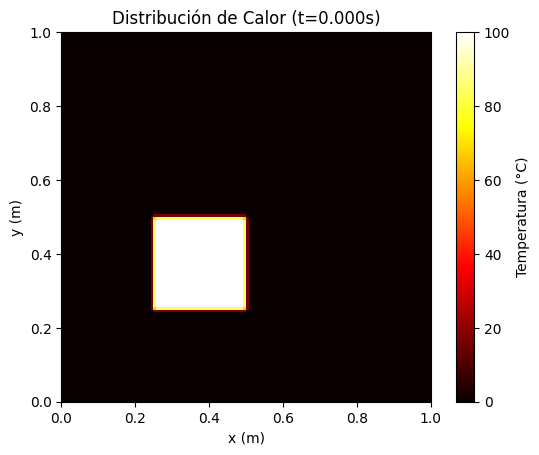

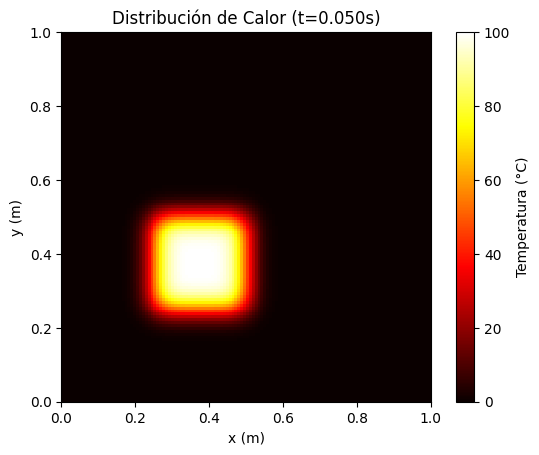

Tiempos por paso: [0.306351900100708, 0.00037097930908203125, 0.00015544891357421875, 0.00014066696166992188, 0.00013828277587890625, 0.00015926361083984375, 0.0001327991485595703, 0.0001308917999267578, 0.0001308917999267578, 0.00012946128845214844, 0.00012946128845214844, 0.00013899803161621094, 0.000133514404296875, 0.0001289844512939453, 0.00012803077697753906, 0.00012826919555664062, 0.0001270771026611328, 0.0001285076141357422, 0.0001285076141357422, 0.0001308917999267578, 0.00013136863708496094, 0.00012803077697753906, 0.0001277923583984375, 0.00012803077697753906, 0.00012826919555664062, 0.00012803077697753906, 0.0001277923583984375, 0.00014352798461914062, 0.00013303756713867188, 0.00012874603271484375, 0.0001277923583984375, 0.0001277923583984375, 0.000125885009765625, 0.00012755393981933594, 0.0001316070556640625, 0.00012969970703125, 0.00012540817260742188, 0.00012493133544921875, 0.00012636184692382812, 0.0001266002655029297, 0.00012636184692382812, 0.000125885009765625, 0

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import cuda, float32
import time


'''Definir kernel de CUDA para actualizar la placa usando memoria compartida'''

@cuda.jit
def update_plate_cuda_shared(u_old, u_new, alpha, dt, dx, dy, Nx, Ny):


    '''Memoria compartida para bloques'''

    shared = cuda.shared.array((34, 34), dtype=float32)  # Bloque + bordes
    tx, ty = cuda.threadIdx.x, cuda.threadIdx.y  # Obtener los índices de hilo dentro del bloque
    bx, by = cuda.blockIdx.x, cuda.blockIdx.y    # Obtener los índices del bloque dentro de la malla
    bw, bh = cuda.blockDim.x, cuda.blockDim.y    # Obtener el tamaño del bloque (dimensiones x e y)


    '''Coordenadas globales del hilo en la malla completa'''

    i, j = bx * bw + tx, by * bh + ty


    '''Cargar los datos en memoria compartida'''

    if i < Nx and j < Ny:
        shared[tx + 1, ty + 1] = u_old[i, j]         # Cargar la temperatura actual en la memoria compartida
        if tx == 0 and i > 0:                        # Borde izquierdo
            shared[0, ty + 1] = u_old[i - 1, j]
        if ty == 0 and j > 0:                        # Borde superior
            shared[tx + 1, 0] = u_old[i, j - 1]
        if tx == bw - 1 and i < Nx - 1:              # Borde derecho
            shared[tx + 2, ty + 1] = u_old[i + 1, j]
        if ty == bh - 1 and j < Ny - 1:              # Borde inferior
            shared[tx + 1, ty + 2] = u_old[i, j + 1]

    cuda.syncthreads() #Sincronizar hilos para asegurar que todos los datos estén cargados'''


    '''Computar la nueva temperatura si no estamos en los bordes'''

    if 1 <= i < Nx - 1 and 1 <= j < Ny - 1:
        u_new[i, j] = shared[tx + 1, ty + 1] + alpha * dt * (
            (shared[tx + 2, ty + 1] - 2 * shared[tx + 1, ty + 1] + shared[tx, ty + 1]) / dx**2 +
            (shared[tx + 1, ty + 2] - 2 * shared[tx + 1, ty + 1] + shared[tx + 1, ty]) / dy**2
        )


'''Inicialización de parámetros'''

Lx, Ly = 1.0, 1.0          # Dimensiones de la placa (en metros)
Nx, Ny = 128, 128          # Número de puntos en x e y (tamaño de la placa)
dx, dy = Lx / Nx, Ly / Ny  # Tamaño de las celdas
alpha = 0.01               # Coeficiente de conductividad térmica
dt = 0.001                 # Paso temporal
T = 0.1                    # Tiempo total de la simulación
timesteps = int(T / dt)    # Número de pasos


'''Condiciones iniciales'''

u_host = np.zeros((Nx, Ny), dtype=np.float32)    # Temperatura inicial (0°C en toda la placa)
u_host[Nx//4:Nx//2, Ny//4:Ny//2] = 100           # Región inicial caliente (100°C)


'''Copiar datos a la memoria del dispositivo (GPU)'''

u_old = cuda.to_device(u_host)          # Temperatura vieja
u_new = cuda.device_array_like(u_old)   # Temperatura nueva


'''Configuración de bloques e hilos'''

threads_per_block = (32, 32)  # Hilos por bloque (32x32 en cada dirección)
blocks_per_grid = (32, 32)    # Número de bloques por grid


'''Lista para almacenar tiempos'''

time_per_step = []  # Para almacenar los tiempos de ejecución de cada paso


'''Simulación'''

for step in range(timesteps):
    start_time = time.time()  # Iniciar temporizador


    '''Ejecutar el kernel de CUDA'''

    update_plate_cuda_shared[blocks_per_grid, threads_per_block](
        u_old, u_new, alpha, dt, dx, dy, Nx, Ny
    )
    cuda.synchronize()  # Asegurarse de que el cálculo en la GPU haya terminado

    end_time = time.time()  # Detener temporizador
    time_per_step.append(end_time - start_time)  # Guardar tiempo en la lista


    '''Intercambiar matrices'''

    u_old, u_new = u_new, u_old


    '''Mostrar resultados cada 50 pasos'''

    if step % 50 == 0:
        u_host = u_old.copy_to_host()  # Copiar los datos de la GPU a la memoria del host
        plt.imshow(u_host, extent=[0, Lx, 0, Ly], origin='lower', cmap='hot', interpolation='nearest', vmin=0, vmax=100)
        plt.colorbar(label="Temperatura (°C)")  # Mostrar barra de colores
        plt.title(f"Distribución de Calor (t={step*dt:.3f}s)")  # Título con el tiempo actual
        plt.xlabel("x (m)")  # Etiqueta en el eje x
        plt.ylabel("y (m)")  # Etiqueta en el eje y
        plt.pause(0.1)  # Pausa para actualizar la visualización

plt.show()  # Mostrar el gráfico al final de la simulación


'''Mostrar los tiempos calculados'''

print("Tiempos por paso:", time_per_step)  # Mostrar el tiempo de cada paso
print("Cantidad de pasos:", len(time_per_step))  # Cantidad total de pasos
print("Tiempo Total:", sum(time_per_step))  # Sumar y mostrar el tiempo total
print()

# Información adicional sobre el rendimiento
print("Se hicieron", len(time_per_step)*1024**2, "cálculos en", sum(time_per_step), "segundos" )
print("Cada cálculo tomó", sum(time_per_step)/(len(time_per_step)*1024**2)*10**9, "nanosegundos")  # Calcular el tiempo por cálculo en nanosegundos

# Gráficas comparando T_opt y T_org

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 9 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


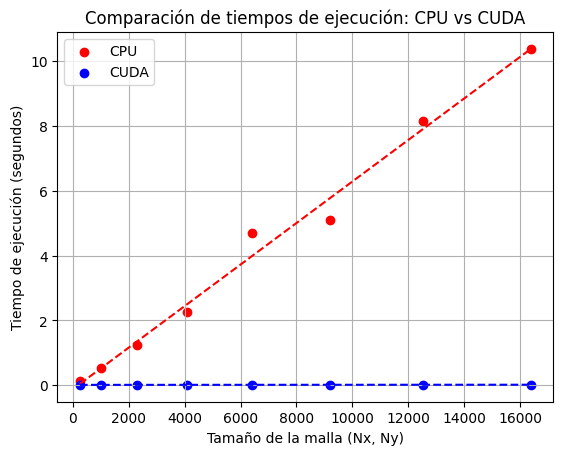

Tiempos en cpu = [0.11774730682373047, 0.5342926979064941, 1.2468738555908203, 2.256908655166626, 4.69350004196167, 5.1104114055633545, 8.15066146850586, 10.364816188812256]
tiempos en cuda = [0.008297443389892578, 0.010621309280395508, 0.011583089828491211, 0.011484384536743164, 0.012024879455566406, 0.012301921844482422, 0.01298832893371582, 0.014672279357910156]
Tiempos total cpu = 32.47521162033081 s
tiempos total cuda = 0.09397363662719727 s
Cuda es mejor que cpu en 345.577895949299 veces


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import cuda, float32

# Función para actualizar la placa en CPU
def update_plate_cpu(u_old, u_new, alpha, dt, dx, dy, Nx, Ny):
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            u_new[i, j] = u_old[i, j] + alpha * dt * (
                (u_old[i + 1, j] - 2 * u_old[i, j] + u_old[i - 1, j]) / dx**2 +
                (u_old[i, j + 1] - 2 * u_old[i, j] + u_old[i, j - 1]) / dy**2
            )

# Definir kernel de CUDA para actualizar la placa usando memoria compartida
@cuda.jit
def update_plate_cuda_shared(u_old, u_new, alpha, dt, dx, dy, Nx, Ny):
    # Memoria compartida para bloques
    shared = cuda.shared.array((34, 34), dtype=float32)  # Bloque + bordes
    tx, ty = cuda.threadIdx.x, cuda.threadIdx.y
    bx, by = cuda.blockIdx.x, cuda.blockIdx.y
    bw, bh = cuda.blockDim.x, cuda.blockDim.y

    # Coordenadas globales
    i, j = bx * bw + tx, by * bh + ty

    # Cargar los datos en memoria compartida
    if i < Nx and j < Ny:
        shared[tx + 1, ty + 1] = u_old[i, j]
        if tx == 0 and i > 0:  # Borde izquierdo
            shared[0, ty + 1] = u_old[i - 1, j]
        if ty == 0 and j > 0:  # Borde superior
            shared[tx + 1, 0] = u_old[i, j - 1]
        if tx == bw - 1 and i < Nx - 1:  # Borde derecho
            shared[tx + 2, ty + 1] = u_old[i + 1, j]
        if ty == bh - 1 and j < Ny - 1:  # Borde inferior
            shared[tx + 1, ty + 2] = u_old[i, j + 1]

    # Sincronizar hilos para asegurar que todos los datos están cargados
    cuda.syncthreads()

    # Computar la nueva temperatura si no estamos en los bordes
    if 1 <= i < Nx - 1 and 1 <= j < Ny - 1:
        u_new[i, j] = shared[tx + 1, ty + 1] + alpha * dt * (
            (shared[tx + 2, ty + 1] - 2 * shared[tx + 1, ty + 1] + shared[tx, ty + 1]) / dx**2 +
            (shared[tx + 1, ty + 2] - 2 * shared[tx + 1, ty + 1] + shared[tx + 1, ty]) / dy**2)

# Función para ejecutar la simulación en CPU
def run_cpu_simulation(Nx, Ny, alpha, dt, dx, dy, timesteps):
    u_old = np.zeros((Nx, Ny), dtype=np.float32)
    u_old[Nx//4:Nx//2, Ny//4:Ny//2] = 100
    u_new = np.zeros_like(u_old)

    start_time = time.time()

    for step in range(timesteps):
        update_plate_cpu(u_old, u_new, alpha, dt, dx, dy, Nx, Ny)
        u_old, u_new = u_new, u_old

    end_time = time.time()
    return end_time - start_time

# Función para ejecutar la simulación en CUDA
def run_cuda_simulation(Nx, Ny, alpha, dt, dx, dy, timesteps):
    u_host = np.zeros((Nx, Ny), dtype=np.float32)
    u_host[Nx//4:Nx//2, Ny//4:Ny//2] = 100

    u_old = cuda.to_device(u_host)
    u_new = cuda.device_array_like(u_old)

    threads_per_block = (32, 32)  # Hilos por bloque
    blocks_x = (Nx + threads_per_block[0] - 1) // threads_per_block[0]
    blocks_y = (Ny + threads_per_block[1] - 1) // threads_per_block[1]
    blocks_per_grid = (blocks_x, blocks_y)

    start_time = time.time()

    for step in range(timesteps):
        update_plate_cuda_shared[blocks_per_grid, threads_per_block](
            u_old, u_new, alpha, dt, dx, dy, Nx, Ny
        )
        cuda.synchronize()  # Asegurarse de que el cálculo en la GPU haya terminado
        u_old, u_new = u_new, u_old

    end_time = time.time()
    return end_time - start_time

# Parámetros de la simulación
Lx, Ly = 1.0, 1.0
alpha = 0.01
dt = 0.001
T = 0.1
timesteps = int(T / dt)
dx, dy = Lx / 128, Ly / 128  # Tamaño de las celdas (puede variar dependiendo de Nx y Ny)

# Listas para almacenar los tiempos de CPU y CUDA
cpu_times = []
cuda_times = []

# Diferentes configuraciones de Nx y Ny
configurations = [(1,1),(16, 16), (32, 32), (48, 48), (64, 64), (80, 80), (96, 96), (112, 112), (128, 128)]

# Ejecutar simulaciones para cada configuración de Nx y Ny
for Nx, Ny in configurations:

    # Actualizar el tamaño de las celdas
    dx, dy = Lx / Nx, Ly / Ny

    # Simulación en CPU
    cpu_time = run_cpu_simulation(Nx, Ny, alpha, dt, dx, dy, timesteps)
    cpu_times.append(cpu_time)

    # Simulación en CUDA
    cuda_time = run_cuda_simulation(Nx, Ny, alpha, dt, dx, dy, timesteps)
    cuda_times.append(cuda_time)

# Graficar los tiempos de ejecución
Nx_values = [config[0] for config in configurations]

del cpu_times[0]
del cuda_times[0]
del Nx_values[0]

Grid = [16**2, 32**2, 48**2, 64**2, 80**2, 96**2, 112**2, 128**2]
x = np.linspace(min(Grid), max(Grid), 100)

# Ajuste cuadratico para CPU
coeffs_cpu = np.polyfit(Grid, cpu_times, 1)
y_cpu = x * coeffs_cpu[0] + coeffs_cpu[1]

# Ajuste lineal para CUDA
coeffs_cuda = np.polyfit(Grid, cuda_times, 1)
y_cuda = x * coeffs_cuda[0] + coeffs_cuda[1]

# Graficar datos originales y ajustes
plt.scatter(Grid, cpu_times, label='CPU', marker='o', color="red")
plt.plot(x, y_cpu, color="red", linestyle="--")

plt.scatter(Grid, cuda_times, label='CUDA', marker='o', color="blue")
plt.plot(x, y_cuda, color="blue", linestyle="--")

plt.xlabel('Tamaño de la malla (Nx, Ny)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de tiempos de ejecución: CPU vs CUDA')
plt.legend()
plt.grid(True)
plt.show()

print(f"Tiempos en cpu = {cpu_times}")
print(f"tiempos en cuda = {cuda_times}")
print(f"Tiempos total cpu = {sum(cpu_times)} s")
print(f"tiempos total cuda = {sum(cuda_times)} s")
print(f"Cuda es mejor que cpu en {sum(cpu_times)/sum(cuda_times)} veces")

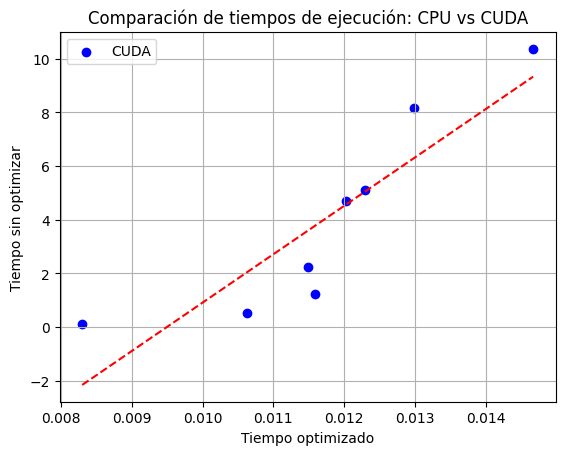

Pendiente: 1801.695403274715
Intersección: -17.104582189987354


In [47]:
x_times = np.linspace(min(cuda_times), max(cuda_times), 100)

coeffs_times = np.polyfit(cuda_times, cpu_times, 1)
y_times = x_times * coeffs_times[0] + coeffs_times[1]


plt.plot(x_times, y_times, color="red", linestyle="--")
plt.scatter(cuda_times, cpu_times, label='CUDA', marker='o', color="blue")
plt.xlabel('Tiempo optimizado')
plt.ylabel('Tiempo sin optimizar')
plt.title('Comparación de tiempos de ejecución: CPU vs CUDA')
plt.legend()
plt.grid(True)
plt.show()

print(f"Pendiente: {coeffs_times[0]}")
print(f"Intersección: {coeffs_times[1]}")